In [2]:
import pandas as pd
import os
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import numpy as np

from pandas.tools.plotting import scatter_matrix
# Import supplementary visualization code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline


In [3]:
path_to_data= "/home/ubuntu/udacity/CodeGladiator/invesco/data"

transaction_file = "Code-Gladiators-Transaction.csv"
investment_exp_file = "Code-Gladiators-InvestmentExperience.csv"
aum_file = "Code-Gladiators-AUM.csv"
activity_file = "Code-Gladiators-Activity.csv"


In [6]:
transaction_df = pd.read_csv(os.path.join(path_to_data, transaction_file))
investment_exp_df = pd.read_csv(os.path.join(path_to_data, investment_exp_file))
aum_df = pd.read_csv(os.path.join(path_to_data, aum_file))
activity_df = pd.read_csv(os.path.join(path_to_data, activity_file))


In [7]:
grouped_advisor_aum_df = aum_df.groupby(['Unique_Advisor_Id','Month']).agg({'AUM': 'sum','Shares':'sum','Unique_Investment_Id':'count'}).reset_index().rename(columns={'Unique_Investment_Id':'Counts'})
grouped_advisor_aum_df.head()


,Unique_Advisor_Id,Month,AUM,Counts,Shares
0,12243,2016 / 01,1.461389e+06,44,109673.678500
1,12243,2016 / 02,1.414581e+06,44,106252.324833
2,12243,2016 / 03,1.426161e+06,44,103253.896694
3,12243,2016 / 04,1.414247e+06,44,100449.798917
4,12243,2016 / 05,1.241367e+06,44,91960.177528


In [8]:
grouped_investment_aum_df = aum_df.groupby(['Unique_Investment_Id','Month']).agg({'AUM': 'sum','Shares':'sum','Unique_Advisor_Id':'count'}).reset_index().rename(columns={'Unique_Advisor_Id':'Counts'})
grouped_investment_aum_df[grouped_investment_aum_df['Unique_Investment_Id'] == 3425].head()

,Unique_Investment_Id,Month,AUM,Counts,Shares
656,3425,2016 / 01,515757.171333,36,28135.758333
657,3425,2016 / 02,509040.019833,36,28135.758333
658,3425,2016 / 03,540765.421500,36,27256.321667
659,3425,2016 / 04,532694.127833,39,26081.948333
660,3425,2016 / 05,247218.462500,38,12041.815000


In [9]:
grouped_investment_aum_df['Year'],grouped_investment_aum_df['Month']=grouped_investment_aum_df['Month'].str.split(' /', 1).str
grouped_advisor_aum_df['Year'],grouped_advisor_aum_df['Month']=grouped_advisor_aum_df['Month'].str.split(' /', 1).str

transaction_df['Year'],transaction_df['Month']=transaction_df['Month'].str.split(' /', 1).str
investment_exp_df['Year'],investment_exp_df['Month']=investment_exp_df['Month'].str.split(' /', 1).str
aum_df['Year'],aum_df['Month']=aum_df['Month'].str.split(' /', 1).str
activity_df['Year'],activity_df['Month']=activity_df['Month'].str.split(' /', 1).str

In [10]:
grouped_investment_aum_df['Mapping_Month']= grouped_investment_aum_df['Month'].astype(int).apply(lambda x : x+1)
grouped_advisor_aum_df['Mapping_Month']= grouped_advisor_aum_df['Month'].astype(int).apply(lambda x : x+1)
investment_exp_df['Mapping_Month']= investment_exp_df['Month'].astype(int).apply(lambda x : x+1)
aum_df['Mapping_Month']= aum_df['Month'].astype(int).apply(lambda x : x+1)
activity_df['Mapping_Month']= activity_df['Month'].astype(int).apply(lambda x : x+1)


grouped_investment_aum_df.head()


,Unique_Investment_Id,Month,AUM,Counts,Shares,Year,Mapping_Month
0,74,01,376166.733333,3,376166.733333,2016,2
1,74,02,376166.733333,3,376166.733333,2016,3
2,74,03,376172.733333,3,376172.733333,2016,4
3,74,04,376175.733333,3,376175.733333,2016,5
4,74,05,376178.833333,3,376178.833333,2016,6


In [11]:
transaction_df['Month'] =  transaction_df['Month'].astype(int).apply(lambda x : x+0)

transaction_df.head()

,Unique_Advisor_Id,Unique_Investment_Id,Month,Transaction_Type,Code_1,Code_2,Code_3,Code_4,Code_5,Amount,Year
0,1000103,20058,1,P,1,48,1,7,4,4678.666667,2016
1,1000103,20058,1,P,1,48,1,7,4,353.066667,2016
2,1000103,20058,1,P,1,48,1,7,4,1809.626667,2016
3,1000103,20058,2,P,1,48,1,7,4,4678.666667,2016
4,1000103,20058,2,P,1,48,1,7,4,353.066667,2016


In [12]:
final_transaction = pd.merge(transaction_df, grouped_investment_aum_df, left_on=["Month","Unique_Investment_Id"],right_on=["Mapping_Month","Unique_Investment_Id"], how="left") 
final_transaction = final_transaction.rename(columns={'Month_x': 'Month', 'AUM': 'AUM_investor','Year_x' : 'Year', 'Counts' : 'Counts_investor', 'Shares': 'Shares_investor','Month_y':'Month_actual'})
final_transaction = final_transaction.drop('Year_y', 1)
final_transaction.head()

,Unique_Advisor_Id,Unique_Investment_Id,Month,Transaction_Type,Code_1,Code_2,Code_3,Code_4,Code_5,Amount,Year,Month_actual,AUM_investor,Counts_investor,Shares_investor,Mapping_Month
0,1000103,20058,1,P,1,48,1,7,4,4678.666667,2016,NaN,NaN,NaN,NaN,NaN
1,1000103,20058,1,P,1,48,1,7,4,353.066667,2016,NaN,NaN,NaN,NaN,NaN
2,1000103,20058,1,P,1,48,1,7,4,1809.626667,2016,NaN,NaN,NaN,NaN,NaN
3,1000103,20058,2,P,1,48,1,7,4,4678.666667,2016,01,1.339674e+06,2.0,132979.907,2.0
4,1000103,20058,2,P,1,48,1,7,4,353.066667,2016,01,1.339674e+06,2.0,132979.907,2.0


In [13]:
final_transaction = pd.merge(final_transaction, grouped_advisor_aum_df, left_on=["Month","Unique_Advisor_Id"],right_on=["Mapping_Month","Unique_Advisor_Id"], how="left") 
final_transaction = final_transaction.rename(columns={'Month_x': 'Month', 'AUM': 'AUM_advisor','Year_x' : 'Year', 'Counts' : 'Counts_advisor', 'Shares': 'Shares_advisor','Mapping_Month_x': 'Mapping_Month'})
final_transaction = final_transaction.drop(['Year_y','Mapping_Month_y','Month_y'], 1)

final_transaction.head()

,Unique_Advisor_Id,Unique_Investment_Id,Month,Transaction_Type,Code_1,Code_2,Code_3,Code_4,Code_5,Amount,Year,Month_actual,AUM_investor,Counts_investor,Shares_investor,Mapping_Month,AUM_advisor,Counts_advisor,Shares_advisor
0,1000103,20058,1,P,1,48,1,7,4,4678.666667,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000103,20058,1,P,1,48,1,7,4,353.066667,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000103,20058,1,P,1,48,1,7,4,1809.626667,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000103,20058,2,P,1,48,1,7,4,4678.666667,2016,01,1.339674e+06,2.0,132979.907,2.0,245350.665667,6.0,13536.409
4,1000103,20058,2,P,1,48,1,7,4,353.066667,2016,01,1.339674e+06,2.0,132979.907,2.0,245350.665667,6.0,13536.409


In [14]:
final_transaction_with_exp = pd.merge(final_transaction, investment_exp_df, left_on=["Month","Unique_Investment_Id"],right_on=["Mapping_Month","Unique_Investment_Id"], how="left") 
final_transaction_with_exp = final_transaction_with_exp.rename(columns={'Month_x': 'Month', 'AUM': 'AUM_advisor','Year_x' : 'Year', 'Mapping_Month_x':'Mapping_Month'})
final_transaction_with_exp = final_transaction_with_exp.drop(['Year_y','Mapping_Month_y','Month_y'], 1)

final_transaction_with_exp.head()

,Unique_Advisor_Id,Unique_Investment_Id,Month,Transaction_Type,Code_1,Code_2,Code_3,Code_4,Code_5,Amount,...,10 Yr Return,1 Yr Excess Return vs Primary Ix,3 Yr Excess Return vs Primary Ix,5 Yr Excess Return vs Primary Ix,10 Yr Excess Return vs Primary Ix,1 Yr Excess Return vs Category Ix,3 Yr Excess Return vs Category Ix,5 Yr Excess Return vs Category Ix,10 Yr Excess Return vs Category Ix,Net Flows
0,1000103,20058,1,P,1,48,1,7,4,4678.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000103,20058,1,P,1,48,1,7,4,353.066667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000103,20058,1,P,1,48,1,7,4,1809.626667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000103,20058,2,P,1,48,1,7,4,4678.666667,...,NaN,-8.314395,NaN,NaN,NaN,-7.017456,NaN,NaN,NaN,-8.360779e+08
4,1000103,20058,2,P,1,48,1,7,4,4678.666667,...,NaN,-15.184451,-9.429957,NaN,NaN,-10.850458,-6.919882,NaN,NaN,-1.618909e+09


In [14]:
final_transaction.count()

Unique_Advisor_Id       163722
Unique_Investment_Id    163722
Month                   163722
Transaction_Type        163722
Code_1                  163722
Code_2                  163722
Code_3                  163722
Code_4                  163722
Code_5                  163722
Amount                  163722
Year                    163722
Month_actual            141139
Counts_investor         141139
AUM_investor            141139
Shares_investor         141139
Mapping_Month           141139
AUM_advisor             134376
Shares_advisor          134376
Counts_advisor          134376
dtype: int64

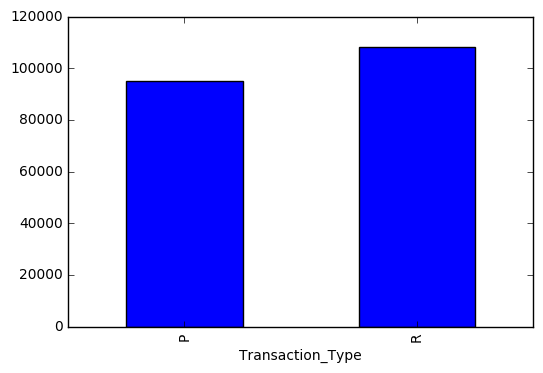

In [24]:
temp1 = final_transaction.pivot_table(values='Shares_advisor',index=['Transaction_Type'],aggfunc=np.median)
temp1.plot(kind='bar')

In [29]:
df = final_transaction[['AUM_investor','AUM_advisor','Shares_investor','Shares_advisor']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05d65b3588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f05d67ddf98>]], dtype=object)

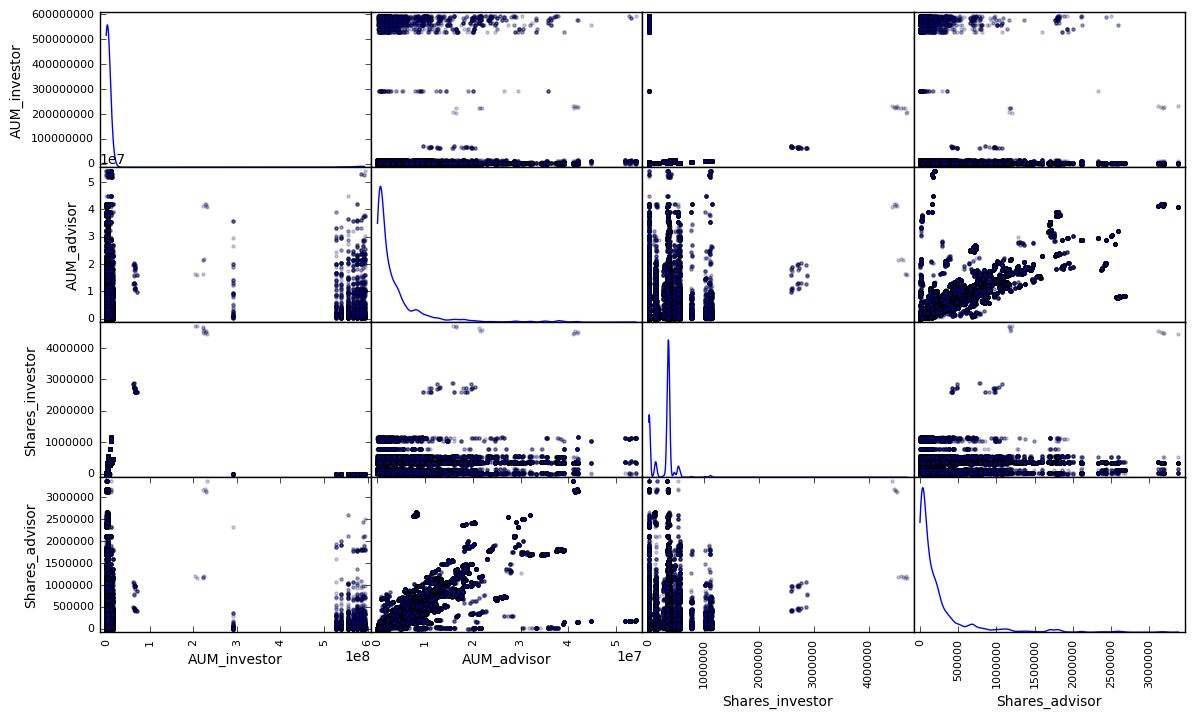

In [32]:
scatter_matrix(df, alpha=0.2,figsize = (14,8), diagonal='kde')

In [15]:
df= final_transaction_with_exp
final_transaction_with_exp.columns

Index(['Unique_Advisor_Id', 'Unique_Investment_Id', 'Month',
       'Transaction_Type', 'Code_1', 'Code_2', 'Code_3', 'Code_4', 'Code_5',
       'Amount', 'Year', 'Month_actual', 'AUM_investor', 'Counts_investor',
       'Shares_investor', 'Mapping_Month', 'AUM_advisor', 'Counts_advisor',
       'Shares_advisor', 'Morningstar Category', 'Investment', 'Rating',
       '1 Yr % Rank', '3 Yr % Rank', '5 Yr % Rank', '10 Yr % Rank',
       '1 Yr Return', '3 Yr Return', '5 Yr Return', '10 Yr Return',
       '1 Yr Excess Return vs Primary Ix', '3 Yr Excess Return vs Primary Ix',
       '5 Yr Excess Return vs Primary Ix', '10 Yr Excess Return vs Primary Ix',
       '1 Yr Excess Return vs Category Ix',
       '3 Yr Excess Return vs Category Ix',
       '5 Yr Excess Return vs Category Ix',
       '10 Yr Excess Return vs Category Ix', 'Net Flows'],
      dtype='object')

In [20]:
table = df.pivot_table(values='10 Yr Return',index=['Transaction_Type'],aggfunc=np.median)

print(table)

Transaction_Type
P    5.240959
R    5.132364
Name: 10 Yr Return, dtype: float64
